In [252]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re

In [18]:
pd.set_option('display.max_columns', 500)

In [253]:
def flattenJSON(json_obj):   
    data = json.loads(json_obj)
    
    def flatten_dict(data):
        for k in list(data):
            if isinstance(data[k], dict):
                child = flatten_dict(data[k])
                for k_ in child:
                    data[k + '.' + k_] = re.sub('^u?\'(.*?)\'','\g<1>',child[k_])
                else:
                    del data[k]
        return data
    
    return flatten_dict(data)

def toConvertableJson(s):    
    def _convertableJson(matchObj):
        if matchObj.group(1):
            return '"'
        elif matchObj.group(2):
            return ':"False"'
        elif matchObj.group(3):
            return ':"True"'
    
    d = flattenJSON(s)
    for i,v in enumerate(d):
        if isinstance(d[v], str) and ('{' in d[v]):
            d[v] = json.loads(re.sub('(\')|(: False)|(: True)',_convertableJson, d[v]))
    return flattenJSON(json.dumps(d))

# Business

In [254]:
with open('yelp_dataset/business.json') as f:
    data = [toConvertableJson(line) for line in f]
bz = pd.DataFrame(data)
bz.drop(['hours','attributes'], axis=1, inplace=True)

In [255]:
bz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.GoodForMeal.dessert,attributes.GoodForMeal.latenight,attributes.GoodForMeal.lunch,attributes.GoodForMeal.dinner,attributes.GoodForMeal.brunch,attributes.GoodForMeal.breakfast,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.Ambience.romantic,attributes.Ambience.intimate,attributes.Ambience.classy,attributes.Ambience.hipster,attributes.Ambience.divey,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Ambience.casual,attributes.BusinessAcceptsCreditCards,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.Music.dj,attributes.Music.background_music,attributes.Music.no_music,attributes.Music.jukebox,attributes.Music.live,attributes.Music.video,attributes.Music.karaoke,attributes.BestNights.monday,attributes.BestNights.tuesday,attributes.BestNights.friday,attributes.BestNights.wednesday,attributes.BestNights.thursday,attributes.BestNights.sunday,attributes.BestNights.saturday,attributes.Ambience,attributes.BusinessParking,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn.straightperms,attributes.HairSpecializesIn.coloring,attributes.HairSpecializesIn.extensions,attributes.HairSpecializesIn.africanamerican,attributes.HairSpecializesIn.curly,attributes.HairSpecializesIn.kids,attributes.HairSpecializesIn.perms,attributes.HairSpecializesIn.asian,attributes.Corkage,attributes.BYOB,attributes.GoodForMeal,attributes.Music,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.gluten-free,attributes.DietaryRestrictions.vegan,attributes.DietaryRestrictions.kosher,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.DietaryRestrictions.vegetarian,attributes.BestNights,attributes.HairSpecializesIn,attributes.Open24Hours,attributes.DietaryRestrictions,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",True,True,True,loud,True,True,2,False,False,False,no,full_bar,casual,True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant

In [90]:
bz.shape

(9630, 14)

In [13]:
bz.drop(['address','postal_code','latitude','longitude','hours'],axis=1,inplace=True)

In [14]:
check = bz.drop(['attributes'],axis=1)
pd.DataFrame({'count':check.count(),'unique':check.nunique(),'null count':check.isnull().sum()})

,count,unique,null count
business_id,192609,192609,0
name,192609,145046,0
city,192609,1204,0
state,192609,36,0
stars,192609,9,0
review_count,192609,1184,0
is_open,192609,2,0
categories,192127,93385,482


In [23]:
bz.head()

,business_id,name,city,state,stars,review_count,is_open,attributes,categories
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,5.0,3,1,None,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi..."


In [68]:
# def unpack(df, column, fillna=None):
#     ret = None
#     if fillna is None:
#         tmp = pd.DataFrame((d for idx, d in df[column].iteritems()))
#         ret = pd.concat([df.drop(column,axis=1), tmp], axis=1)
#     else:
#         tmp = pd.DataFrame((d for idx, d in 
#         df[column].iteritems())).fillna(fillna)
#         ret = pd.concat([df.drop(column,axis=1), tmp], axis=1)
#     return ret

# x = bz['attributes'][:5].apply(pd.Series)
# x

#### Filter for restaurants/businesses dealing with food

('Restaurants' in x) or (('Bars' in x) and ('Cigar Bars' not in x) and ('Oxygen Bars' not in x)) or ('Food' in x) or ('Coffee & Tea' in x) or ('Fast Food' in x) or ('Burger' in x) or ('Pizza' in x) or ('Sandwiches' in x) or ('Breakfast & Brunch' in x)

In [287]:
rt = bz[bz['categories'].apply(lambda x:('Restaurants' in x) or (('Bars' in x) and ('Cigar Bars' not in x) and ('Oxygen Bars' not in x)) or ('Food' in x) or ('Coffee & Tea' in x) or ('Fast Food' in x) or ('Burger' in x) or ('Pizza' in x) or ('Sandwiches' in x) or ('Breakfast & Brunch' in x) if x is not None else False)]

#### drop core features

In [289]:
for i in rt.columns:
    if 'Hair' in i:
        rt.drop(rt[(rt[i]=='False') | (rt[i]=='True')]['business_id'].index, axis=0, inplace=True)
        rt.drop(columns=i, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### drop training features

In [290]:
for i in rt.columns:
    if 'hour' in i:
        rt.drop(columns=i, axis=1, inplace=True)

In [260]:
# restaurant.to_csv('./yelp_dataset/restaurant.csv')

# User

In [267]:
with open('yelp_dataset/user.json') as f:
    data = [json.loads(line) for line in f]
us = pd.DataFrame(data)

# us = pd.read_csv('sample_dataset/user_sample.csv')
# us.rename(columns={'Unnamed: 0':'ix'},inplace=True)
# us.set_index('ix',inplace=True)

In [269]:
us.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,2,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,0,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85,1,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08,28,1,0,0,1,16,57,80,80,25,5


In [119]:
us.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [272]:
pd.DataFrame({'count':us.count(),'unique':us.nunique(),'null count':us.isnull().sum()})

,count,unique,null count
user_id,1637138,1637138,0
name,1637138,124917,0
review_count,1637138,1791,0
yelping_since,1637138,1631010,0
useful,1637138,4737,0
funny,1637138,3490,0
cool,1637138,3950,0
elite,1637138,756,0
friends,1637138,933769,0
fans,1637138,591,0


In [273]:
# get the average of the # of compliments in each category
# could be that they are inclined to go to more restaurants due to more compliments
us.filter(regex='compliment').agg({'mean'})

,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
mean,2.242225,0.332595,0.213513,0.190208,0.083585,1.503944,3.090273,3.106818,3.106818,1.165329,1.138432


In [274]:
# aggregate the # of compliments into 'compliments' column
# then drop all individual compliments columns
us['compliments'] = us.filter(regex='compliment').sum(axis=1)
us.drop(list(us.filter(regex='compliment_')),axis=1,inplace=True)

# convert to datetime yelping_since
us['yelping_since'] = pd.to_datetime(us['yelping_since'])

# aggregate count of friends instead of having list of friends
# us['friends'] = us['friends'].apply(lambda x:len(x.split(',')))

In [275]:
max(us['review_count'])

13278

In [276]:
us['review_count']

0           95
1           33
2           16
3           17
4          361
          ... 
1637133      2
1637134      8
1637135      4
1637136      1
1637137      1
Name: review_count, Length: 1637138, dtype: int64

(array([775443., 294903., 228604.,  99396.,  55182.,  37962.]),
 array([ 0,  5, 10, 20, 30, 40, 50]),
 <a list of 6 Patch objects>)

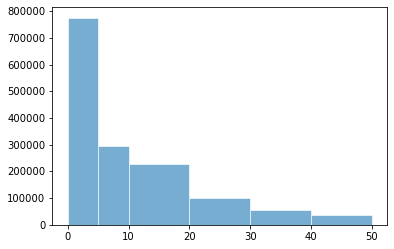

In [270]:
# check the distribution of review counts
plt.hist(us['review_count'],bins=[0, 5, 10, 20, 30, 40, 50],alpha=0.6,ec='white')

<BarContainer object of 15 artists>

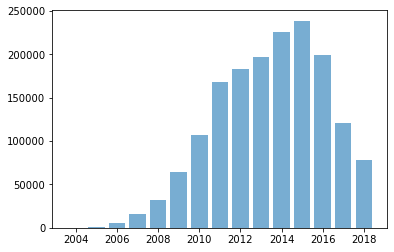

In [277]:
# check the distribution of yelp_since years
x = us.groupby(us["yelping_since"].dt.year).count()['user_id']
plt.bar(x.index, x, alpha=0.6)

In [283]:
# how many have never been elite?
(us['elite']=='').sum()
# us['elite'][us['elite'].isnull()==False].count()

1565761

# Reviews

In [284]:
## DON"T RUN AGAIN UNLESS NECESSARY (memory)
# with open('yelp_dataset/review.json') as f:
#     data = [json.loads(line) for line in f]
# rv = pd.DataFrame(data)

# rv = pd.read_csv('sample_dataset/review_sample.csv')
# rv.rename(columns={'Unnamed: 0':'ix'},inplace=True)
# rv.set_index('ix',inplace=True)

#### merge the review dataset to business dataset to filter reviews fo necessary businesses

In [292]:
#review_restaurant = review[review['business_id'].apply(lambda x:x in list(restaurant['business_id']))]
res_k = rt[['business_id']]
rv = res_k.merge(rv, how='left',on='business_id')

In [293]:
rv.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,QXAEGFB4oINsVuTFxEYKFQ,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3.0,2.0,0.0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,QXAEGFB4oINsVuTFxEYKFQ,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0.0,0.0,0.0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,QXAEGFB4oINsVuTFxEYKFQ,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0.0,0.0,0.0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,QXAEGFB4oINsVuTFxEYKFQ,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1.0,1.0,0.0,0.0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,QXAEGFB4oINsVuTFxEYKFQ,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4.0,2.0,1.0,2.0,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55


In [294]:
pd.DataFrame({'count':rv.count(),'unique':rv.nunique(),'null count':rv.isnull().sum()})

,count,unique,null count
business_id,4684209,77289,0
review_id,4684208,4684208,1
user_id,4684208,1207830,1
stars,4684208,5,1
useful,4684208,259,1
funny,4684208,215,1
cool,4684208,185,1
text,4684208,4673480,1
date,4684208,4619738,1


In [233]:
# what is the average star rating for a restaurant on yelp
rv.agg({'stars':'mean'})

stars    3.7157
dtype: float64

In [235]:
# aggregate the number of votes people casted on a review for each user
# use this value to make a new column in user column
rv.groupby('user_id').agg({'useful':'sum','funny':'sum','cool':'sum'}).sum(axis=1)

user_id
---1lKK3aKOuomHnwAkAow     21
--0kuuLmuYBe3Rmu0Iycww      5
--2HUmLkcNHZp0xw6AMBPg      0
--2PnhMMH7EYoY3wywOvgQ      4
--2vR0DIsmQ6WfcSzKWigw    657
                         ... 
zzsmdXHUFBYuKUtPbXWjRA      1
zzsw8F_LGVU-L7hb8357Fw      0
zztIVfCNMpfvCU7yEjDDVw      0
zzzAgDDWe4PTnJuwhi3XQQ      1
zzzTrQ2bkvteEngjkXCTAA      0
Length: 226123, dtype: int64

In [241]:
# want to map the number of votes for reviews users wrote but the numbers don't match up
# it's because it's a sample of the dataset
print('# of userID for user.json: {}'.format(us['user_id'].nunique()))
print('# of userID for reviews.json: {}'.format(rv['user_id'].nunique()))

# of userID for user.json: 81857
# of userID for reviews.json: 226123


# Check In

In [263]:
with open('yelp_dataset/checkin.json') as f:
    data = [json.loads(line) for line in f]
ci = pd.DataFrame(data)
ci.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


# Tips

In [264]:
with open('yelp_dataset/tip.json') as f:
    data = [json.loads(line) for line in f]
tip = pd.DataFrame(data)
tip.head()

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


# Photos

In [265]:
with open('yelp_dataset/photo.json') as f:
    data = [json.loads(line) for line in f]
ph = pd.DataFrame(data)
ph.head()

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


In [266]:
ph['label'].value_counts()

food       114874
inside      52448
drink       18121
outside     11534
menu         3023
Name: label, dtype: int64